In [2]:
# libraries for exploring data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [3]:
# import advertisement dataset

df = pd.read_csv(r"D:\ML\Machine Learning_Practical\Data\Advertising.csv")

In [4]:
# explore data
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Dataset stores following **information**:
1. Expenditure on **`TV Advertisements`** (_Thousand \$_)
2. Expenditure on **`Radio Advertisements`** (_Thousand \$_)
3. Expenditure on **`Newspaper Advertisements`** (_Thousand \$_)
4. Total **`Sales`** (_Thousand \$_)


# Visualize Dataset- Relationship among features

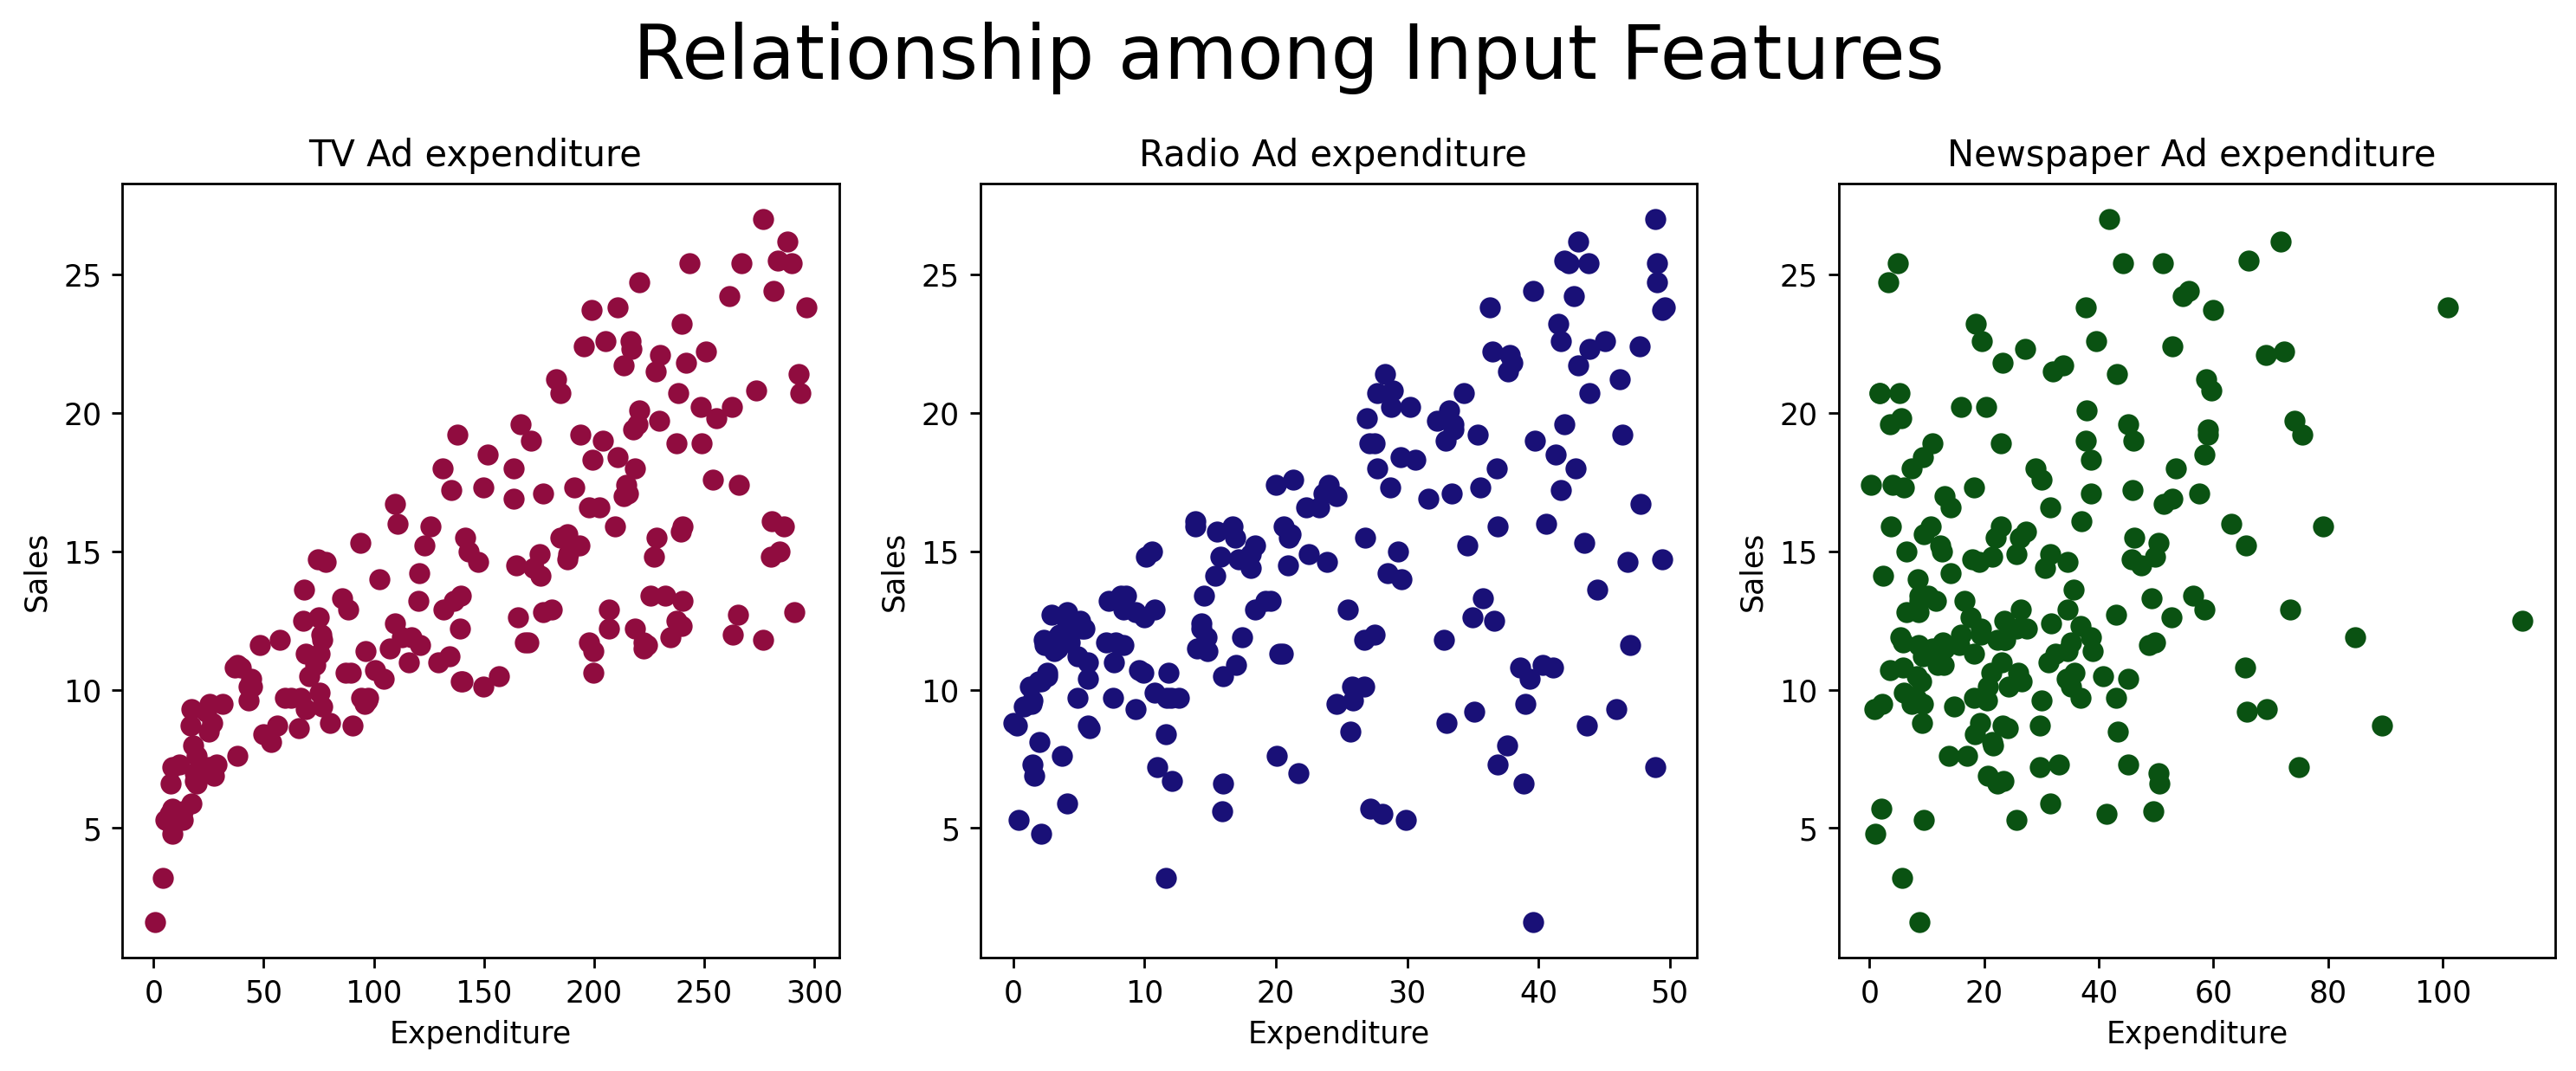

In [14]:
# create sub-plots for visualizing relationships

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), dpi=250)

ax1, ax2, ax3 = axes[0], axes[1], axes[2]

ax1.scatter(df["TV"], df["sales"], marker="o", color="#900C3F")
ax1.set_ylabel("Sales")
ax1.set_xlabel("Expenditure")
ax1.set_title("TV Ad expenditure ")


ax2.scatter(df["radio"], df["sales"], marker="o", color="#191077")
ax2.set_ylabel("Sales")
ax2.set_xlabel("Expenditure")
ax2.set_title("Radio Ad expenditure ")

ax3.scatter(df["newspaper"], df["sales"], marker="o", color="#0A5212")
ax3.set_ylabel("Sales")
ax3.set_xlabel("Expenditure")
ax3.set_title("Newspaper Ad expenditure ")


fig.suptitle("Relationship among Input Features", fontsize=25)

plt.tight_layout()

Spending on advertising on **TV** and **Radio** shows strong **linear relationship** with total sales.\
Relationship between **Newspaper Ad spending** and total sales is **less obvious**.

In [15]:
# NOTE: Can use seaborn pairplot() for similar analysis

# sns.pairplot(df)

In [50]:
# average sales amount
mean_sales = df["sales"].mean(axis=0)

print(mean_sales)

14.0225


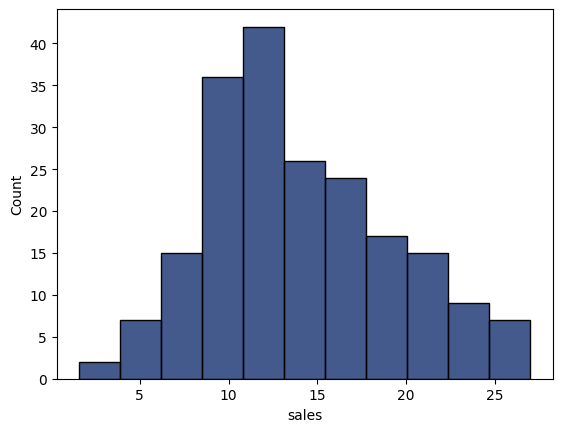

In [46]:
# histogram of sales

sns.histplot(data=df, x="sales", stat="count", color="#062366");

# Data Pre-processing

In [17]:
# input features

# all columns except "sales" will be inputs
# drop col named "sales" along columns (axis=1)
X = df.drop("sales", axis=1)

# target values

# "sales" column will be target variable
y = df["sales"]

In [18]:
# show input features
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
# show target labels
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

Since data is **already adequately scaled** need **not perform feature scaling** for this dataset and problem.

In [20]:
# check size of dataset
print(f"Size of dataset -> {X.shape[0]} Rows and {X.shape[1]} Columns")
print(f"\nInput features: {X.columns}")

Size of dataset -> 200 Rows and 3 Columns

Input features: Index(['TV', 'radio', 'newspaper'], dtype='object')


## Training set & Test set

In [27]:
# for splitting (shuffle split) dataset into training & test set
from sklearn.model_selection import train_test_split

In [25]:
# create training set & test set
# 70% Data -> Training set; 30% Data -> Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#### NOTE:
>`X_train` and `y_train` will have **retain index position values** (_similarly for_ `X_test` & `y_test`) -> Allows **evaluating model performance** later by matching corresponding X & y values.

In [28]:
# check size of datasets
print(f"Size of original dataset -> {X.shape[0]} Rows and {X.shape[1]} Columns")
print(f"Size of Training set -> {X_train.shape[0]} Rows and {X_train.shape[1]} Columns")
print(f"Size of Test set -> {X_test.shape[0]} Rows and {X_test.shape[1]} Columns")

Size of original dataset -> 200 Rows and 3 Columns
Size of Training set -> 140 Rows and 3 Columns
Size of Test set -> 60 Rows and 3 Columns


# Creating a ML Model

>Scikit Learn refers ML models as **`estimators`**.

In [31]:
# import linear regression model (estimator)
from sklearn.linear_model import LinearRegression

In [33]:
# create instance of Linear regression model with default parameters
LRModel = LinearRegression()

# Training the ML Model on Training set

In [34]:
LRModel.fit(X_train, y_train)

LinearRegression()

# Make Predictions on Test set

In [37]:
test_predictions = LRModel.predict(X_test)

In [41]:
print(f"First 5 predictions (on Test set) for sales -> \n{test_predictions[0:5]}")

First 5 predictions (on Test set) for sales -> 
[10.05866652  7.43318827  6.95305695 24.16874598 11.98172029]


# Evaluating ML Model's Perfromance

In [43]:
# import different error metrics for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Mean Absolute Error in prediction

In [47]:
# mean_absolute_error(true y, predicted y)

mae = mean_absolute_error(y_test, test_predictions)

In [137]:
print(f"Mean of Actual Sales value = {mean_sales} (thousand $)")
print(f"Mean of Predicted Sales value = {test_predictions.mean()} (thousand $)")
print(f"Mean Absolute Error in predictions = ${round(mae, ndigits=4)} (thousand $)")
print(f"Predictions were off by ~{(abs(test_predictions.mean() - mean_sales)/mean_sales)*100}%")

Mean of Actual Sales value = 14.0225 (thousand $)
Mean of Predicted Sales value = 13.347698888128855 (thousand $)
Mean Absolute Error in predictions = $1.2334 (thousand $)
Predictions were off by ~4.8122739302631174%


## Mean Squared Error in prediction

>Allows catching instances where model's predictions for few datapoints were too far off from reality (_even if it did well for most datapoints_).

In [54]:
# mean_sqaured_error(true y, predicted y)

mse = mean_squared_error(y_test, test_predictions)

In [56]:
# square root of mse to make units comparable to dataset labels

mse_sqrt = np.sqrt(mse)

In [138]:
print(f"Root Mean Squared error in model's predictions on Test set = {mse_sqrt} (thousand $)")

Root Mean Squared error in model's predictions on Test set = 1.9213003007595164 (thousand $)


#### NOTE:
>`Mean Absolute Error` < `Root Mean Squared Error`\
indicates that ML model performed well for most datapoints, though for some points it was far off actual value.

# Evaluating choice of ML Model- _Is Linear Regression a good fit?_

Plotting and visualizing **test residuals** can give idea about suitability of the model for this dataset.
>**`test_residuals`** = **`y_test`** - **`test_predictions`** \
_i.e. How far off were the predictions from the ground truth for each datapoint?_
>>_**Ideal** case (when model fits perfectly) ->_ **`test_residuals = 0`** _for all datapoints._

In [60]:
# test_residuals

test_residuals = y_test - test_predictions

print(f"First 10 test residuals:\n{test_residuals[0:10]}")

First 10 test residuals:
18     1.241333
170    0.966812
107    1.746943
98     1.231254
177   -0.281720
182    2.155353
5     -5.994268
146   -1.702403
12    -1.876753
152    0.349383
Name: sales, dtype: float64


## Visualizing Test Residuals

### Scatter Plot for Test Residuals and Actual ground truth

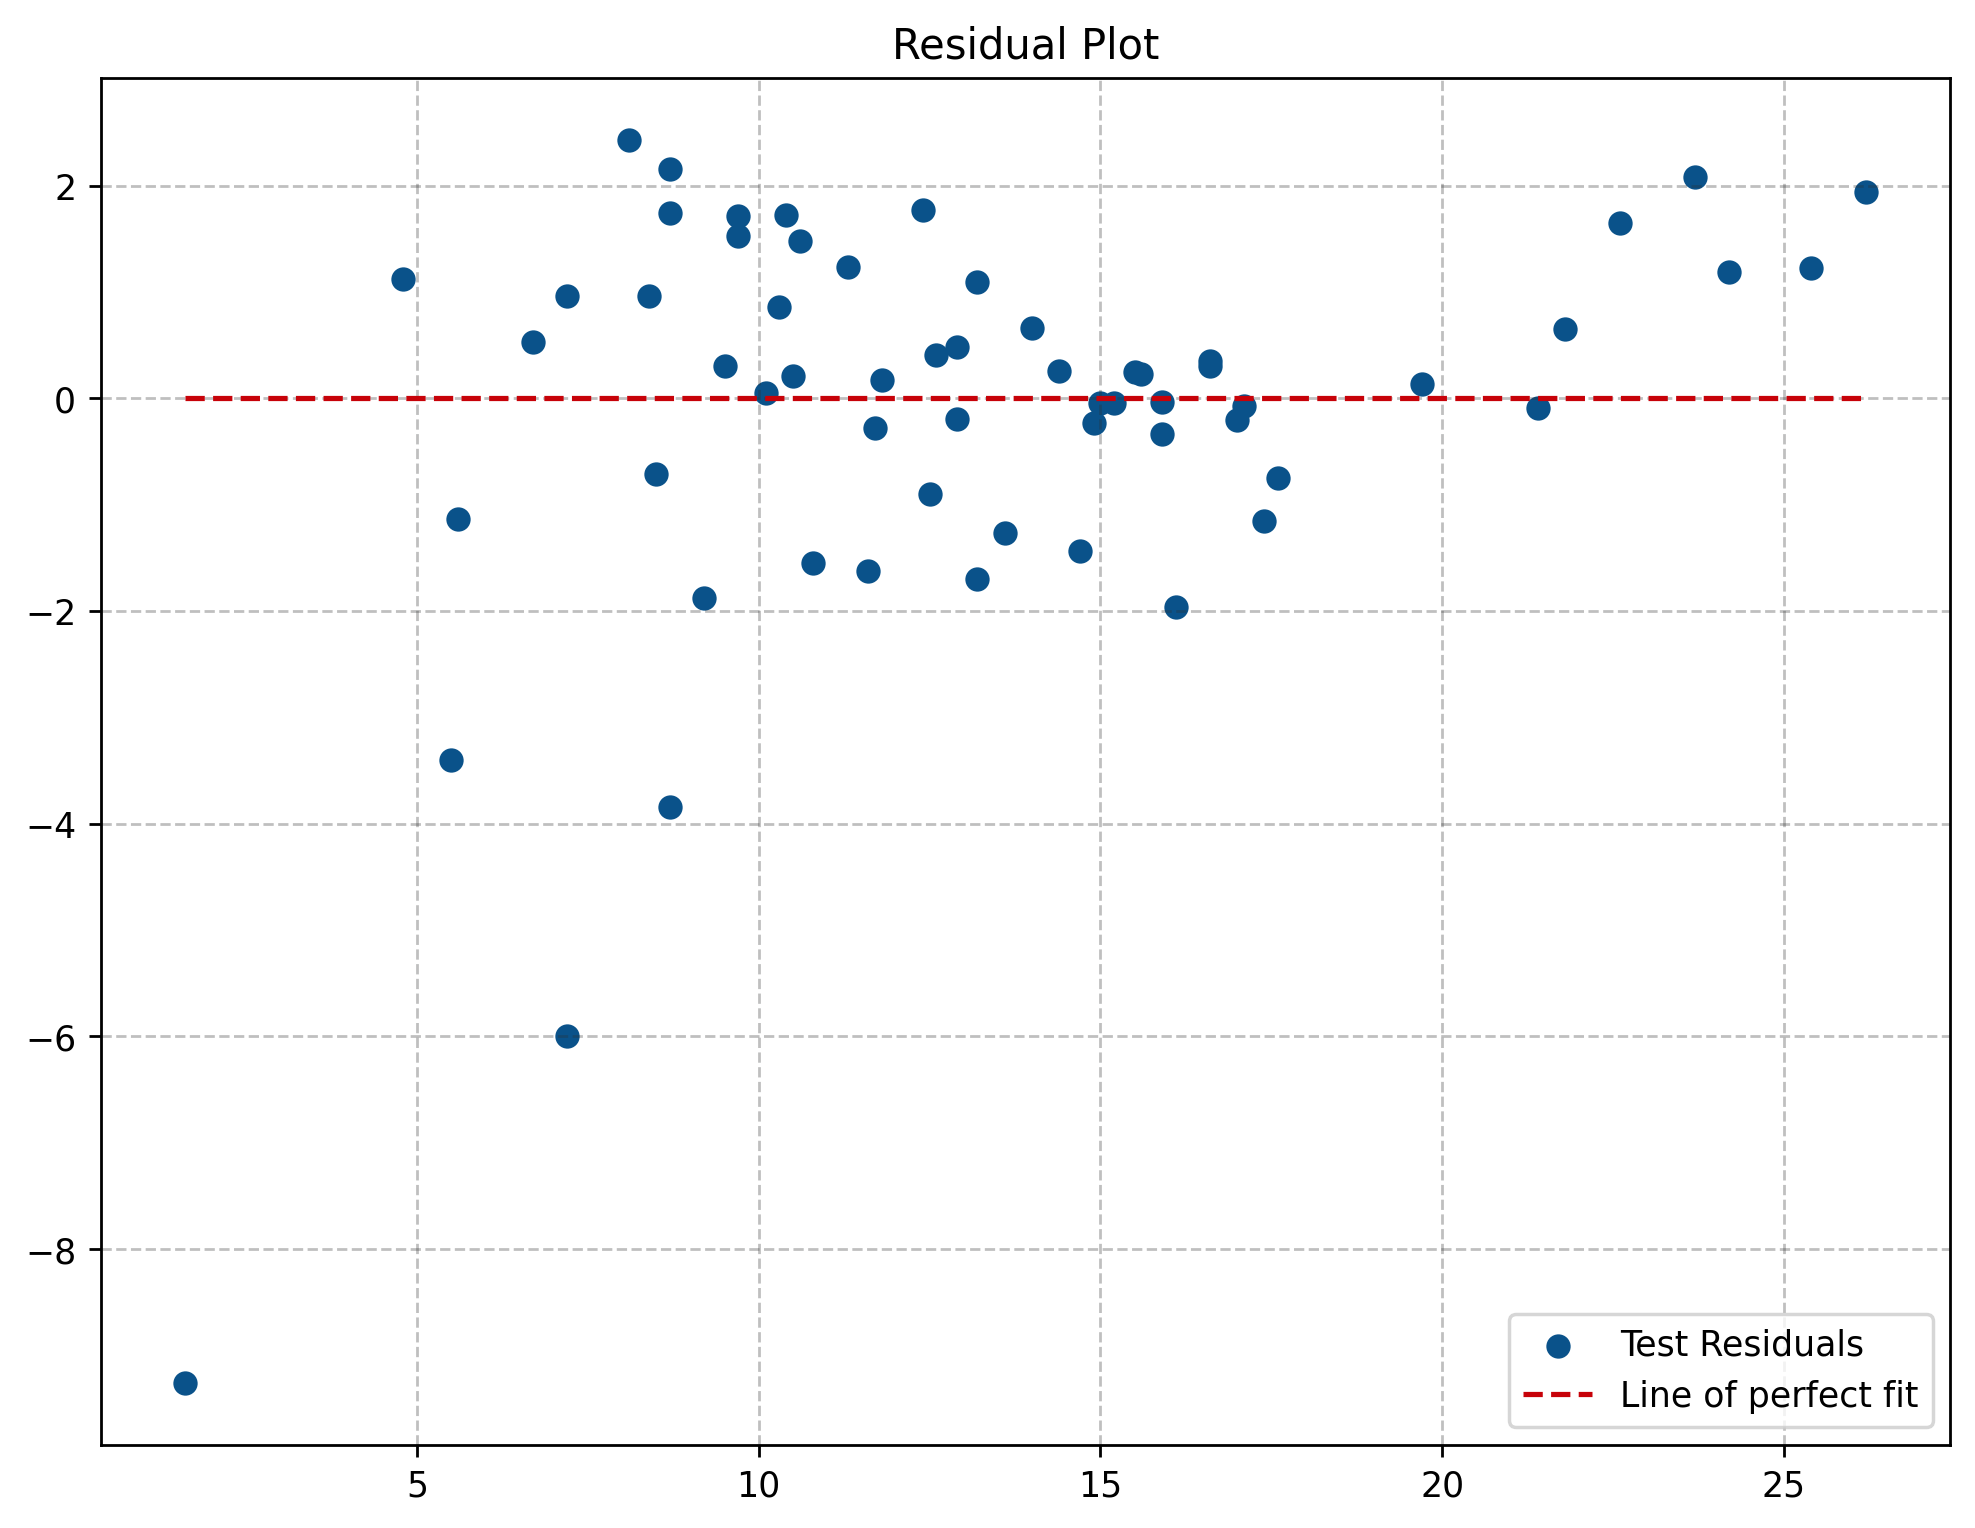

In [95]:
fig, axes = plt.subplots(figsize=(8, 6), dpi=250)
axes.scatter(y_test, test_residuals, color="#0a528a", label="Test Residuals")
axes.hlines(y=0, xmin= y_test.min(), xmax=y_test.max(), linestyle="--",
            color="#c70209", alpha=1, label="Line of perfect fit")
fig.tight_layout()
axes.set_title("Residual Plot")
axes.legend(loc="lower right")
axes.grid(linestyle="--", alpha=0.3, color="#2d2e2e")

#### Observation 1
Test residual plot shows the points are **not perfectly randomly scattered** around the line of perfect fit.
>_If Residual scatter plot looks randomly distributed then means the ML Model was a good choice for the current dataset._ 

Further investigation using a **distribution plot** to check if residual values are **normally distributed** should be done.

### Distribution Plot for Test Residuals

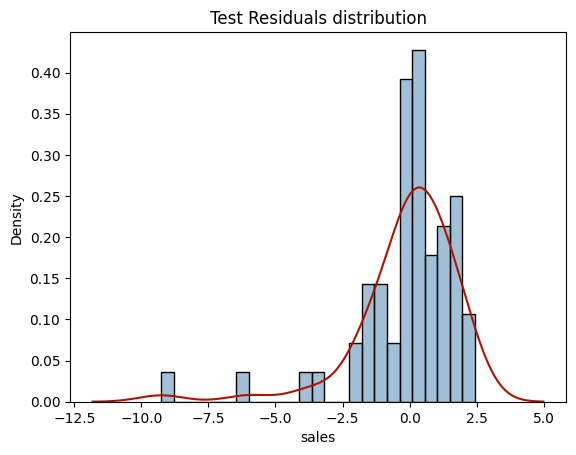

In [127]:
sns.histplot(data=test_residuals, bins=25, stat="density",
             color="#4083B1", alpha=0.5)
sns.kdeplot(data=test_residuals, color="#B21300")
plt.title("Test Residuals distribution");

#### Observation 2
KDE Plot shows test residual points are **roughly normally distributed** with a **mild left skew**.

However, main analysis as per test residual **scatter plot** shows that **`LRModel` linear regression model** fits quite well though there is still room for improvement.

# Conclusion on Linear Regression Model for current dataset

From the various analysis' performed above after fitting the Linear Regression model to the current dataset (_Sales data and Advertisement expenditure_) one can conclude that **`Linear Regression Model`** was indeed an appropriate choice for the dataset.

# Deploying the Trained Model (_Saving it for future use_)

In [130]:
# final model of choice after above analysis
LRModel_final = LinearRegression()

In [132]:
# fit entire dataset to final model
LRModel_final.fit(X, y)

LinearRegression()

In [134]:
# retrieve regression plane coefficients after training
LR_coefficients = LRModel_final.coef_

In [135]:
print(f"Coefficients of plane of best fit:\n", LR_coefficients)

Coefficients of plane of best fit:
 [ 0.04576465  0.18853002 -0.00103749]


### Observation
Coefficient for **`Newspaper Ad expense`** is **almost zero** compared to coefficients for remaining input features.
>_This supports the preliminary observation from scatterplot of Relationship among Input features (above) which revealed no clear relationship between_ `Newspaper Ad expense` _and_ `Sales`.